First, I load modules to be used in the execution of the problem:

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import math
import HW03_utils as ut
import numpy as np
from matplotlib import pyplot as plt

Then, I define custom functions to be used in the program (the last two are used to calculate the mean and covariance matrix):

In [4]:
def normalize_images(image_vectors):
# Function to normalize pixel contrast of images

        magnitudes = np.linalg.norm(image_vectors,axis=1)
        normalized_ims = image_vectors/magnitudes[:,None]
        return normalized_ims

In [5]:
def get_class_bounds(classid,labels):
# Function to extract index bounds of the specified class from the dataset

    for i in range(len(labels)):
        if labels[i] == classid:
            startindex = i
            break
    stopindex = len(labels)
    for i in range(i,len(labels)):
        if labels[i] != classid:
            stopindex = i
            break
    
    return startindex,stopindex


In [6]:
def get_class_from_data(classid,data,labels):
# Find the start (inclusive) and end (exclusive) of a class within the data, then separate and return the class

    startindex,stopindex = get_class_bounds(classid,labels)
    
    # Separate the specified class
    class_data = data[startindex:stopindex]
            
    return class_data


In [7]:
def mean_of_class(classid,data,labels):
# Calculate the mean value when the class is fit to a normal distribution
    
    class_data = get_class_from_data(classid,data,labels)   
    # Calculate the mean of the class data
    class_mu = np.mean(class_data,axis=0)
    
    return class_mu


In [8]:
def cov_of_class(classid,data,labels):
# Calcualte the covariance matrix when the class is fit to a normal distribution

    class_data = get_class_from_data(classid,data,labels)
    # Calculate the covariance matrix from the class data
    class_Sigma = np.cov(class_data,rowvar=False)
    
    return class_Sigma


Now comes the program execution. To start, I specify local paths to the data and then load it into memory.

In [9]:
CS_DIR = r"/Users/mitch/Documents/Cal/2 - 2017 Spring/COMPSCI 289A - Intro to Machine Learning/"

In [10]:
# Load MNIST data
data_array = ut.loaddata("hw3_mnist_dist/hw3_mnist_dist/train.mat",CS_DIR+r"HW03/Data","trainX")

Immediately after loading the data, I shuffle it and then separate it into data and labels.

In [11]:
# Shuffle data and set aside validation set
np.random.shuffle(data_array)

trainarray = data_array[:-10000]
valarray = data_array[-10000:]

# Organize array by digit
trainarray_byclass = trainarray[trainarray[:,-1].argsort()]
valarray_byclass = valarray[valarray[:,-1].argsort()]

In [12]:
train_data = trainarray_byclass[:,:-1]
train_labels = trainarray_byclass[:,-1]

val_data = valarray_byclass[:,:-1]
val_labels = valarray_byclass[:,-1]

To maintain consistency between calculations, I normalize all the images using a custom defined function (given above).

In [13]:
normalized_traindata = normalize_images(train_data)
normalized_valdata = normalize_images(val_data)

For each digit, I calculate the mean and covariance matrix and then plot both.

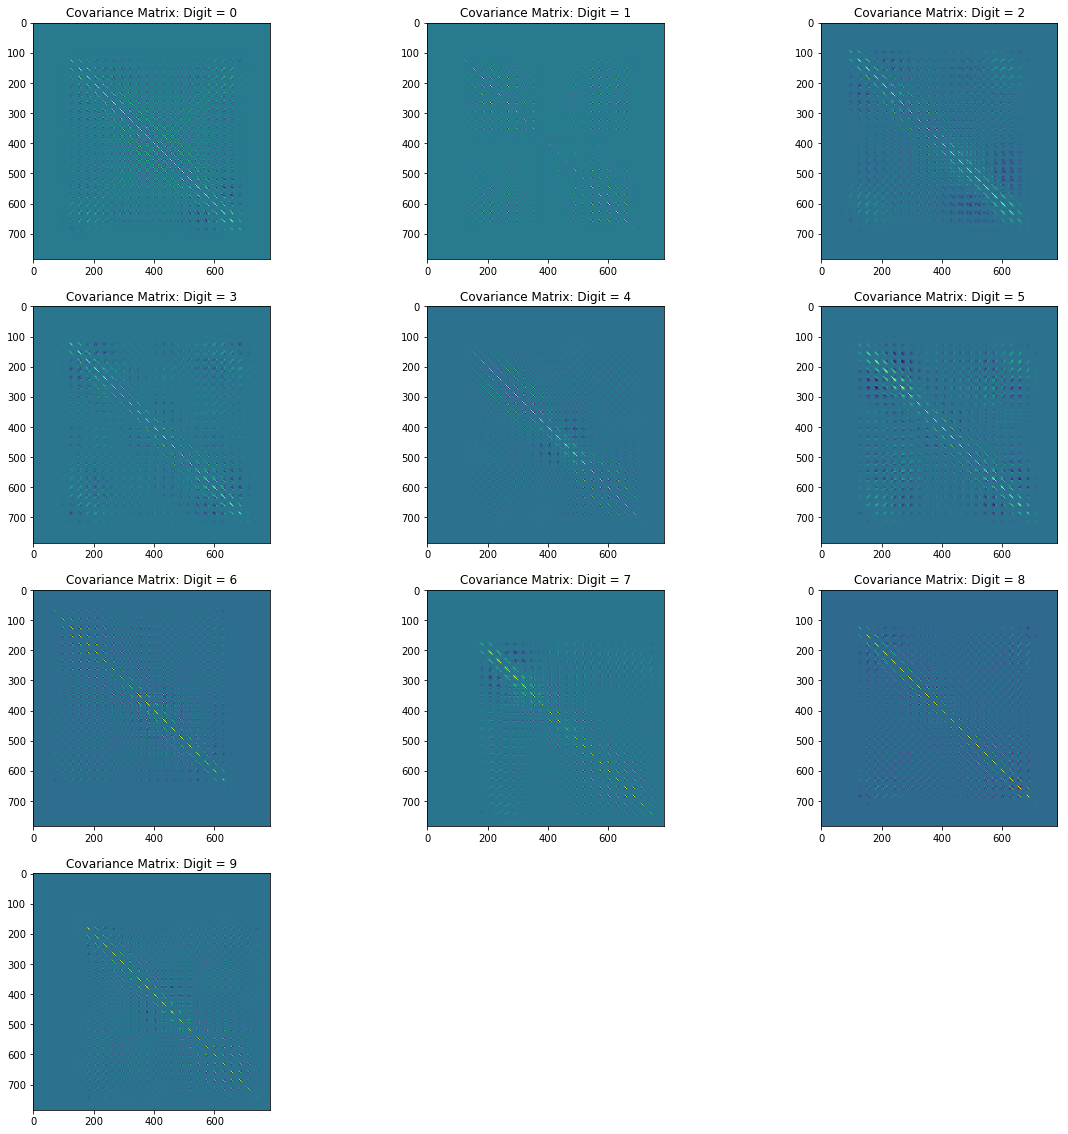

In [14]:
fig = plt.figure(figsize=(20,20))
for i in range(10):
    mu_i = mean_of_class(i,normalized_traindata,train_labels)
    Sigma_i = cov_of_class(i,normalized_traindata,train_labels)

    plt.subplot(4,3,i+1)
    plt.imshow(Sigma_i)
    plt.title('Covariance Matrix: Digit = %i' %i)
plt.savefig('VisualCovMatrices.jpg')
plt.show()
    
    